### Import

In [2]:

!pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.5/98.5 MB 7.8 MB/s eta 0:00:00


In [3]:
import pandas as pd
import numpy as np
import random
import os
from datetime import datetime
import sys
from catboost import CatBoostRegressor,Pool
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import Lasso

In [4]:
from google.colab import drive
from importlib import reload

drive.mount('/content/gdrive',force_remount = True)


Mounted at /content/gdrive


### utils module import

In [5]:
if 'gdrive.MyDrive.utils' not in sys.modules:
  import  gdrive.MyDrive.utils as utils
else:
  print("utils reload")
  reload(utils)

if 'gdrive.MyDrive.data_EDA' not in sys.modules:
  import gdrive.MyDrive.data_EDA as EDA
else:
  print('eda module reload')
  reload(EDA)

version 1


In [6]:
project_name = '소득예측'

### util 설정

In [7]:
utils.seed_everything(311)
utils.set_dir(project_name)

현재 폴더 :  /content/gdrive/MyDrive/data/소득예측
데이터 위치 :  /content/gdrive/MyDrive/data/소득예측/sample_data
submission 위치 :  /content/gdrive/MyDrive/data/소득예측/sample_data


### Load Data

In [ ]:
train, test, submission = utils.get_data()
train.head(5)


load from train :  /content/gdrive/MyDrive/data/소득예측/sample_data/train.csv
load from train :  /content/gdrive/MyDrive/data/소득예측/sample_data/test.csv
load from submission :  /content/gdrive/MyDrive/data/소득예측/sample_data/sample_submission.csv


,ID,Age,Gender,Education_Status,Employment_Status,Working_Week (Yearly),Industry_Status,Occupation_Status,Race,Hispanic_Origin,...,Citizenship,Birth_Country,Birth_Country (Father),Birth_Country (Mother),Tax_Status,Gains,Losses,Dividends,Income_Status,Income
0,TRAIN_00000,63,M,Middle (7-8),Full-Time,4,Social Services,Services,White,All other,...,Native,US,US,US,Nonfiler,0,0,0,Unknown,425
1,TRAIN_00001,37,M,Associates degree (Vocational),Full-Time,52,Entertainment,Services,White,All other,...,Native,US,US,US,Single,0,0,0,Under Median,0
2,TRAIN_00002,58,F,High graduate,Full-Time,52,Manufacturing (Non-durable),Admin Support (include Clerical),Black,All other,...,Native,US,US,US,Married Filling Jointly both under 65 (MFJ),3411,0,0,Under Median,860
3,TRAIN_00003,44,M,High graduate,Full-Time,52,Retail,Technicians & Support,White,All other,...,Native,US,US,US,Single,0,0,0,Under Median,850
4,TRAIN_00004,37,F,High graduate,Full-Time,52,Retail,Sales,White,All other,...,Native,US,US,US,Head of Household (HOH),0,0,0,Unknown,570


### 모델 1 - baseline

In [ ]:
train_x = train.drop(columns = ['ID','Income'])
train_y = train['Income']
cat_features = ['Gender','Education_Status','Employment_Status','Working_Week (Yearly)', 'Industry_Status',
                'Occupation_Status','Race','Hispanic_Origin','Martial_Status','Household_Status','Household_Summary',
                'Citizenship','Birth_Country','Birth_Country (Father)', 'Birth_Country (Mother)',"Tax_Status",
                'Losses','Income_Status']

In [ ]:
train_pool = Pool(train_x, train_y, cat_features=cat_features)


In [ ]:
cat_model = CatBoostRegressor(verbose=20,iterations=300)

In [ ]:
cat_model.fit(train_pool)

Learning rate set to 0.174921
0:	learn: 675.2452760	total: 50.9ms	remaining: 15.2s
20:	learn: 591.3576612	total: 1.22s	remaining: 16.1s
40:	learn: 586.2925025	total: 2.41s	remaining: 15.2s
60:	learn: 582.5239495	total: 4.49s	remaining: 17.6s
80:	learn: 580.9499584	total: 6.51s	remaining: 17.6s
100:	learn: 578.1107895	total: 7.74s	remaining: 15.3s
120:	learn: 575.9682002	total: 9s	remaining: 13.3s
140:	learn: 572.8701507	total: 10.3s	remaining: 11.6s
160:	learn: 569.5960753	total: 11.5s	remaining: 9.94s
180:	learn: 567.4424655	total: 12.8s	remaining: 8.41s
200:	learn: 564.5129777	total: 14.1s	remaining: 6.95s
220:	learn: 563.3442580	total: 15.4s	remaining: 5.5s
240:	learn: 561.6155216	total: 17.1s	remaining: 4.2s
260:	learn: 559.9172189	total: 19.6s	remaining: 2.92s
280:	learn: 556.9740975	total: 21s	remaining: 1.42s
299:	learn: 554.3377003	total: 22.2s	remaining: 0us


In [ ]:
test.head(5)
# test=test.drop(columns=['ID'])
test.fillna("",inplace=True)
test_pool = Pool(test, cat_features=cat_features)
preds = cat_model.predict(test_pool)
submission['Income'] = preds
display(submission.head(10))
submission.to_csv('/content/gdrive/MyDrive/data/소득예측/sample_data/base_cat.csv', index=False)

,ID,Income
0,TEST_0000,41.510860
1,TEST_0001,9.102236
2,TEST_0002,425.863268
3,TEST_0003,669.113792
4,TEST_0004,6.229883
5,TEST_0005,735.739011
6,TEST_0006,412.043743
7,TEST_0007,1.341529
8,TEST_0008,-16.322086
9,TEST_0009,1054.778702


In [ ]:
submission['Income'][submission['Income']<0] = 0
submission.head(10)

<ipython-input-62-ecc6d72e6ace>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  submission['Income'][submission['Income']<0] = 0


,ID,Income
0,TEST_0000,41.510860
1,TEST_0001,9.102236
2,TEST_0002,425.863268
3,TEST_0003,669.113792
4,TEST_0004,6.229883
5,TEST_0005,735.739011
6,TEST_0006,412.043743
7,TEST_0007,1.341529
8,TEST_0008,0.000000
9,TEST_0009,1054.778702


In [ ]:
submission.to_csv('/content/gdrive/MyDrive/data/소득예측/sample_data/base_cat_not_zero.csv', index=False)

count    10000.000000
mean       558.017622
std        376.788358
min          0.000000
25%        329.472549
50%        579.825547
75%        826.842394
max       1827.451171
Name: Income, dtype: float64

### 모델2. log scale target

In [14]:
train, test, submission = utils.get_data()
train_x = train.drop(columns = ['ID','Income','Household_Status'])
train_y = train['Income']
cat_features = ['Gender','Education_Status','Employment_Status','Working_Week (Yearly)', 'Industry_Status',
                'Occupation_Status','Race','Hispanic_Origin','Martial_Status','Household_Summary',
                'Citizenship','Birth_Country','Birth_Country (Father)', 'Birth_Country (Mother)',"Tax_Status",
                'Losses','Income_Status']
train_y = np.log(train_y+1)

load from train :  /content/gdrive/MyDrive/data/소득예측/sample_data/train.csv
load from train :  /content/gdrive/MyDrive/data/소득예측/sample_data/test.csv
load from submission :  /content/gdrive/MyDrive/data/소득예측/sample_data/sample_submission.csv


In [15]:
train_pool = Pool(train_x, train_y, cat_features=cat_features)
cat_model = CatBoostRegressor(verbose=50,iterations=500)
cat_model.fit(train_pool)


Learning rate set to 0.115473
0:	learn: 3.2084746	total: 54.9ms	remaining: 27.4s
499:	learn: 2.3169790	total: 34.3s	remaining: 0us


In [19]:
# test=test.drop(columns=['ID','Household_Status'])
test_pool = Pool(test, cat_features=cat_features)
preds = cat_model.predict(test_pool)
submission['Income'] = np.exp(preds)
display(submission.head(10))
submission.to_csv('/content/gdrive/MyDrive/data/소득예측/sample_data/cat_drop_household.csv', index=False)

,ID,Income
0,TEST_0000,1.089665
1,TEST_0001,1.054516
2,TEST_0002,180.371952
3,TEST_0003,328.576955
4,TEST_0004,0.986893
5,TEST_0005,181.387525
6,TEST_0006,260.819934
7,TEST_0007,1.014665
8,TEST_0008,0.962539
9,TEST_0009,387.656645


결과 :

<Axes: ylabel='Count'>

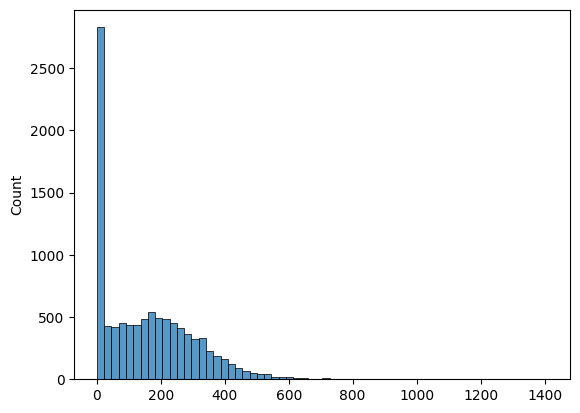

In [21]:
import seaborn as sns
sns.histplot(np.exp(preds))


### 모델3 : hispanic_origin na와 do not know 합치기

In [35]:
train, test, submission = utils.get_data()
train_x = train.drop(columns = ['ID','Income','Household_Status'])
# print(train_x[train_x['Hispanic_Origin']==' Do not know'])
train_x['Hispanic_Origin'][train_x['Hispanic_Origin']==' Do not know']=' NA'
print(train_x['Hispanic_Origin'].value_counts())
train_y = train['Income']
cat_features = ['Gender','Education_Status','Employment_Status','Working_Week (Yearly)', 'Industry_Status',
                'Occupation_Status','Race','Hispanic_Origin','Martial_Status','Household_Summary',
                'Citizenship','Birth_Country','Birth_Country (Father)', 'Birth_Country (Mother)',"Tax_Status",
                'Losses','Income_Status']
train_y = np.log(train_y+1)



load from train :  /content/gdrive/MyDrive/data/소득예측/sample_data/train.csv
load from train :  /content/gdrive/MyDrive/data/소득예측/sample_data/test.csv
load from submission :  /content/gdrive/MyDrive/data/소득예측/sample_data/sample_submission.csv
 All other                    17769
 Mexican-American               654
 Mexican (Mexicano)             624
 Central or South American      325
 Puerto Rican                   243
 Other Spanish                  201
 NA                              81
 Cuban                           76
 Chicano                         27
Name: Hispanic_Origin, dtype: int64


<ipython-input-35-bca8ee862736>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_x['Hispanic_Origin'][train_x['Hispanic_Origin']==' Do not know']=' NA'


In [36]:
train_pool = Pool(train_x, train_y, cat_features=cat_features)
cat_model = CatBoostRegressor(verbose=50,iterations=500)
cat_model.fit(train_pool)
test=test.drop(columns=['ID','Household_Status'])
test_pool = Pool(test, cat_features=cat_features)
preds = cat_model.predict(test_pool)
submission['Income'] = np.exp(preds)
display(submission.head(10))
submission.to_csv('/content/gdrive/MyDrive/data/소득예측/sample_data/cat_drop_household.csv', index=False)

Learning rate set to 0.115473
0:	learn: 3.2084746	total: 76ms	remaining: 37.9s
50:	learn: 2.4609149	total: 2.84s	remaining: 25s
100:	learn: 2.4343989	total: 5.71s	remaining: 22.6s
150:	learn: 2.4159994	total: 8.94s	remaining: 20.7s
200:	learn: 2.4015489	total: 13.3s	remaining: 19.7s
250:	learn: 2.3870514	total: 16.3s	remaining: 16.2s
300:	learn: 2.3743905	total: 19.3s	remaining: 12.8s
350:	learn: 2.3635966	total: 22.7s	remaining: 9.64s
400:	learn: 2.3515685	total: 26.9s	remaining: 6.64s
450:	learn: 2.3368089	total: 30s	remaining: 3.26s
499:	learn: 2.3244946	total: 33.4s	remaining: 0us


,ID,Income
0,TEST_0000,1.031255
1,TEST_0001,1.003324
2,TEST_0002,210.720505
3,TEST_0003,261.217540
4,TEST_0004,0.958499
5,TEST_0005,223.314319
6,TEST_0006,308.905125
7,TEST_0007,1.002562
8,TEST_0008,0.988432
9,TEST_0009,333.726504


### Model4 : log 보정값 변경

In [58]:
train, test, submission = utils.get_data()
train_x = train.drop(columns = ['ID','Income','Household_Status'])
# print(train_x[train_x['Hispanic_Origin']==' Do not know'])
train_x['Hispanic_Origin'][train_x['Hispanic_Origin']==' Do not know']=' NA'
print(train_x['Hispanic_Origin'].value_counts())
train_y = train['Income']
cat_features = ['Gender','Education_Status','Employment_Status','Working_Week (Yearly)', 'Industry_Status',
                'Occupation_Status','Race','Hispanic_Origin','Martial_Status','Household_Summary',
                'Citizenship','Birth_Country','Birth_Country (Father)', 'Birth_Country (Mother)',"Tax_Status",
                'Losses','Income_Status']
train_y = np.log(train_y+100000)

load from train :  /content/gdrive/MyDrive/data/소득예측/sample_data/train.csv
load from train :  /content/gdrive/MyDrive/data/소득예측/sample_data/test.csv
load from submission :  /content/gdrive/MyDrive/data/소득예측/sample_data/sample_submission.csv
 All other                    17769
 Mexican-American               654
 Mexican (Mexicano)             624
 Central or South American      325
 Puerto Rican                   243
 Other Spanish                  201
 NA                              81
 Cuban                           76
 Chicano                         27
Name: Hispanic_Origin, dtype: int64


<ipython-input-58-f008d4676a3e>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_x['Hispanic_Origin'][train_x['Hispanic_Origin']==' Do not know']=' NA'


Learning rate set to 0.115473
0:	learn: 0.0067161	total: 57.3ms	remaining: 28.6s
50:	learn: 0.0057480	total: 2.82s	remaining: 24.8s
100:	learn: 0.0056952	total: 5.93s	remaining: 23.4s
150:	learn: 0.0056647	total: 9.95s	remaining: 23s
200:	learn: 0.0056221	total: 13.3s	remaining: 19.7s
250:	learn: 0.0055759	total: 16.3s	remaining: 16.2s
300:	learn: 0.0055443	total: 19.4s	remaining: 12.8s
350:	learn: 0.0055074	total: 24s	remaining: 10.2s
400:	learn: 0.0054790	total: 27.2s	remaining: 6.71s
450:	learn: 0.0054519	total: 30.2s	remaining: 3.28s
499:	learn: 0.0054196	total: 33.1s	remaining: 0us


<ipython-input-60-dda64c5a1f3c>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  submission['Income'][submission['Income']<0]=0


,ID,Income
0,TEST_0000,36.650003
1,TEST_0001,0.000000
2,TEST_0002,396.278037
3,TEST_0003,655.557877
4,TEST_0004,0.000000
5,TEST_0005,783.624446
6,TEST_0006,354.927719
7,TEST_0007,3.744569
8,TEST_0008,0.000000
9,TEST_0009,1030.266549


,Income
count,10000.000000
mean,560.586311
std,379.253051
min,0.000000
25%,325.671358
50%,588.143271
75%,832.748586
max,1775.325287


<Axes: ylabel='Density'>

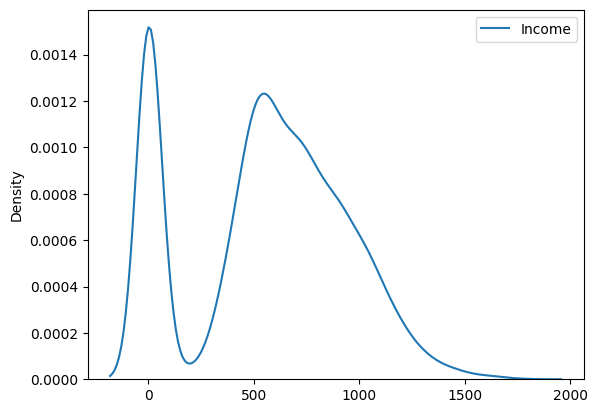

In [60]:
train_pool = Pool(train_x, train_y, cat_features=cat_features)
cat_model = CatBoostRegressor(verbose=50,iterations=500)
cat_model.fit(train_pool)
test=test.drop(columns=['ID','Household_Status'])
test_pool = Pool(test, cat_features=cat_features)
preds = cat_model.predict(test_pool)
submission['Income'] = np.exp(preds)-100000
submission['Income'][submission['Income']<0]=0
display(submission.head(10))
display(submission.describe())
display(sns.kdeplot(submission))
submission.to_csv('/content/gdrive/MyDrive/data/소득예측/sample_data/cat_drop_log100000.csv', index=False)

In [199]:
train, test, submission = utils.get_data()
train_x = train.drop(columns = ['ID','Income','Household_Status'])
# print(train_x[train_x['Hispanic_Origin']==' Do not know'])
train_x['Hispanic_Origin'][train_x['Hispanic_Origin']==' Do not know']=' NA'
print(train_x['Hispanic_Origin'].value_counts())
train_y = train['Income']
cat_features = ['Gender','Education_Status','Employment_Status','Working_Week (Yearly)', 'Industry_Status',
                'Occupation_Status','Race','Hispanic_Origin','Martial_Status','Household_Summary',
                'Citizenship','Birth_Country','Birth_Country (Father)', 'Birth_Country (Mother)',"Tax_Status",
                'Losses','Income_Status']
train_y = np.log(train_y+10000)
train_pool = Pool(train_x, train_y, cat_features=cat_features)
cat_model = CatBoostRegressor(verbose=50,iterations=500)
cat_model.fit(train_pool)
test=test.drop(columns=['ID','Household_Status'])
test_pool = Pool(test, cat_features=cat_features)
preds = cat_model.predict(test_pool)
submission['Income'] = np.exp(preds)-10000
submission['Income'][submission['Income']<0]=0
display(submission.head(10))
display(submission.describe())
display(sns.kdeplot(submission))
submission.to_csv('/content/gdrive/MyDrive/data/소득예측/sample_data/cat_drop_log10000.csv', index=False)

load from train :  /content/gdrive/MyDrive/data/소득예측/sample_data/train.csv
load from train :  /content/gdrive/MyDrive/data/소득예측/sample_data/test.csv
load from submission :  /content/gdrive/MyDrive/data/소득예측/sample_data/sample_submission.csv
 All other                    17769
 Mexican-American               654
 Mexican (Mexicano)             624
 Central or South American      325
 Puerto Rican                   243
 Other Spanish                  201
 NA                              81
 Cuban                           76
 Chicano                         27
Name: Hispanic_Origin, dtype: int64


<ipython-input-199-69dbe2db548f>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_x['Hispanic_Origin'][train_x['Hispanic_Origin']==' Do not know']=' NA'


Learning rate set to 0.115473
0:	learn: 0.0597074	total: 72.3ms	remaining: 36.1s
50:	learn: 0.0502860	total: 3.41s	remaining: 30s


KeyboardInterrupt: 

### Model 5 : income 범주 별 oversampling

In [205]:
train, test, submission = utils.get_data()
# train_x = train.drop(columns = ['ID','Income','Household_Status'])
train_x = train.drop(columns = ['ID','Household_Status'])
test = test.drop(columns = ['ID','Household_Status'])
# print(train_x[train_x['Hispanic_Origin']==' Do not know'])
train_x['Hispanic_Origin'][train_x['Hispanic_Origin']==' Do not know']=' NA'
print(train_x['Hispanic_Origin'].value_counts())

cat_features = ['Gender','Education_Status','Employment_Status','Working_Week (Yearly)', 'Industry_Status',
                'Occupation_Status','Race','Hispanic_Origin','Martial_Status','Household_Summary',
                'Citizenship','Birth_Country','Birth_Country (Father)', 'Birth_Country (Mother)',"Tax_Status",
                'Losses','Income_Status']

load from train :  /content/gdrive/MyDrive/data/소득예측/sample_data/train.csv
load from train :  /content/gdrive/MyDrive/data/소득예측/sample_data/test.csv
load from submission :  /content/gdrive/MyDrive/data/소득예측/sample_data/sample_submission.csv
 All other                    17769
 Mexican-American               654
 Mexican (Mexicano)             624
 Central or South American      325
 Puerto Rican                   243
 Other Spanish                  201
 NA                              81
 Cuban                           76
 Chicano                         27
Name: Hispanic_Origin, dtype: int64


<ipython-input-205-48f106321dcd>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_x['Hispanic_Origin'][train_x['Hispanic_Origin']==' Do not know']=' NA'


In [ ]:
!pip install category_encoders

In [192]:
from category_encoders.cat_boost import CatBoostEncoder
cat_encoder = CatBoostEncoder()

cat_encoder.fit(train_x.drop(columns=['Income']),train_y )

CatBoostEncoder(cols=['Gender', 'Education_Status', 'Employment_Status',
                      'Industry_Status', 'Occupation_Status', 'Race',
                      'Hispanic_Origin', 'Martial_Status', 'Household_Summary',
                      'Citizenship', 'Birth_Country', 'Birth_Country (Father)',
                      'Birth_Country (Mother)', 'Tax_Status', 'Income_Status'])

In [ ]:
train_fit_x = cat_encoder.transform(train_x.drop(columns=['Income']))
test_fit_x = cat_encoder.transform(test)
train_fit_x['Income']=train_x['Income']
print(train_fit_x)
train_fit_x.info()

In [209]:
from imblearn.over_sampling import SMOTE, RandomOverSampler

oversampling_instance = SMOTE()
randomsampler = RandomOverSampler()
# over_train_x, over_train_y = oversampling_instance.fit_resample(train_fit_x,train_fit_x['Income']//1000 )
over_train_x, over_train_y = randomsampler.fit_resample(train_x, train_x['Income']//1000)
# over_train_x['Income']=np.log(over_train_x['Income']+10000)

<Axes: xlabel='Income', ylabel='Count'>

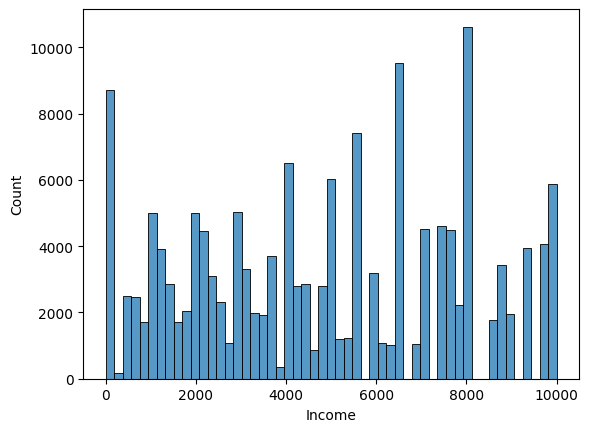

In [210]:
sns.histplot(over_train_x['Income'])

In [211]:
o_t_x = over_train_x.drop(columns=['Income'])
o_t_y = over_train_x['Income']

In [215]:
display(o_t_x.head())
display(test_fit_x.head())
display(o_t_y.head())
display(test.head())


,Age,Gender,Education_Status,Employment_Status,Working_Week (Yearly),Industry_Status,Occupation_Status,Race,Hispanic_Origin,Martial_Status,Household_Summary,Citizenship,Birth_Country,Birth_Country (Father),Birth_Country (Mother),Tax_Status,Gains,Losses,Dividends,Income_Status
0,63,M,Middle (7-8),Full-Time,4,Social Services,Services,White,All other,Married,Householder,Native,US,US,US,Nonfiler,0,0,0,Unknown
1,37,M,Associates degree (Vocational),Full-Time,52,Entertainment,Services,White,All other,Separated,Householder,Native,US,US,US,Single,0,0,0,Under Median
2,58,F,High graduate,Full-Time,52,Manufacturing (Non-durable),Admin Support (include Clerical),Black,All other,Married,Householder,Native,US,US,US,Married Filling Jointly both under 65 (MFJ),3411,0,0,Under Median
3,44,M,High graduate,Full-Time,52,Retail,Technicians & Support,White,All other,Divorced,Householder,Native,US,US,US,Single,0,0,0,Under Median
4,37,F,High graduate,Full-Time,52,Retail,Sales,White,All other,Divorced,Householder,Native,US,US,US,Head of Household (HOH),0,0,0,Unknown


,Age,Gender,Education_Status,Employment_Status,Working_Week (Yearly),Industry_Status,Occupation_Status,Race,Hispanic_Origin,Martial_Status,Household_Summary,Citizenship,Birth_Country,Birth_Country (Father),Birth_Country (Mother),Tax_Status,Gains,Losses,Dividends,Income_Status
0,79,9.268524,9.256260,9.256076,0,9.210351,9.210351,9.263158,9.264242,9.245258,9.275445,9.262929,9.262929,9.256186,9.259400,9.268397,0,0,0,9.260833
1,47,9.268524,9.241639,9.256076,0,9.210351,9.210351,9.263158,9.246706,9.245258,9.259862,9.262929,9.262929,9.264182,9.263919,9.216209,0,0,0,9.260833
2,18,9.256692,9.256260,9.256076,52,9.260744,9.258918,9.263158,9.264242,9.245258,9.259862,9.262929,9.262929,9.264182,9.263919,9.268397,0,0,0,9.260833
3,39,9.256692,9.291057,9.280457,30,9.277818,9.258918,9.263158,9.264242,9.274510,9.268480,9.262929,9.262929,9.264182,9.263919,9.279660,0,0,0,9.261603
4,6,9.268524,9.210364,9.256076,0,9.210351,9.210351,9.263158,9.249911,9.245258,9.216623,9.262929,9.262929,9.264182,9.263919,9.216209,0,0,0,9.261603


0    425
1      0
2    860
3    850
4    570
Name: Income, dtype: int64

,Age,Gender,Education_Status,Employment_Status,Working_Week (Yearly),Industry_Status,Occupation_Status,Race,Hispanic_Origin,Martial_Status,Household_Summary,Citizenship,Birth_Country,Birth_Country (Father),Birth_Country (Mother),Tax_Status,Gains,Losses,Dividends,Income_Status
0,79,M,High Junior,Children or Armed Forces,0,Not in universe or children,Unknown,White,All other,Single,Householder,Native,US,Unknown,Unknown,Single,0,0,0,Under Median
1,47,M,Elementary (5-6),Children or Armed Forces,0,Not in universe or children,Unknown,White,Other Spanish,Single,Child 18 or older,Native,US,US,US,Nonfiler,0,0,0,Under Median
2,18,F,High Junior,Children or Armed Forces,52,Retail,Services,White,All other,Single,Child 18 or older,Native,US,US,US,Single,0,0,0,Under Median
3,39,F,Associates degree (Vocational),Full-Time,30,Medical (except Hospitals),Services,White,All other,Married,Spouse of householder,Native,US,US,US,Married Filling Jointly both under 65 (MFJ),0,0,0,Unknown
4,6,M,Children,Children or Armed Forces,0,Not in universe or children,Unknown,White,Mexican-American,Single,Child under 18 never married,Native,US,US,US,Nonfiler,0,0,0,Unknown


Learning rate set to 0.160148
0:	learn: 2650.1682899	total: 999ms	remaining: 8m 18s
50:	learn: 629.5838790	total: 30.7s	remaining: 4m 30s
100:	learn: 531.4833190	total: 54.5s	remaining: 3m 35s
150:	learn: 475.0033089	total: 1m 19s	remaining: 3m 2s
200:	learn: 441.3613524	total: 1m 43s	remaining: 2m 34s
250:	learn: 413.1756863	total: 2m 8s	remaining: 2m 7s
300:	learn: 391.9059632	total: 2m 31s	remaining: 1m 40s
350:	learn: 378.2538118	total: 2m 56s	remaining: 1m 15s
400:	learn: 365.1446296	total: 3m 21s	remaining: 49.9s
450:	learn: 353.9725792	total: 3m 46s	remaining: 24.6s
499:	learn: 343.1116732	total: 4m 9s	remaining: 0us


,ID,Income
0,TEST_0000,0
1,TEST_0001,0
2,TEST_0002,0
3,TEST_0003,0
4,TEST_0004,0
5,TEST_0005,0
6,TEST_0006,0
7,TEST_0007,0
8,TEST_0008,0
9,TEST_0009,0


<ipython-input-217-afca5f44883b>:9: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  display(sns.kdeplot(submission))


<Axes: ylabel='Density'>

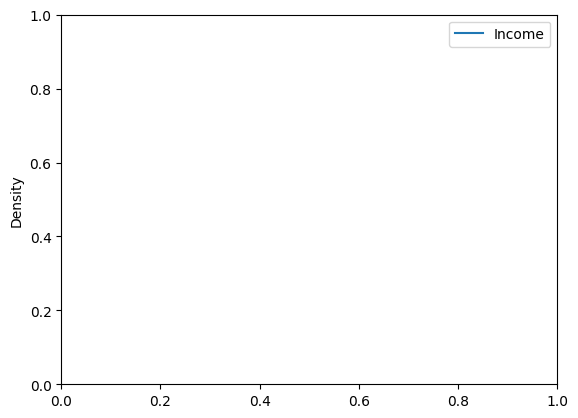

In [217]:
train_pool = Pool(o_t_x, o_t_y,cat_features=cat_features)
cat_model = CatBoostRegressor(verbose=50,iterations=500)
cat_model.fit(train_pool)
test_pool = Pool(test,cat_features=cat_features)
preds = cat_model.predict(test_pool)
# preds = np.exp(preds)-10000
# submission['Income'][submission['Income']<0]=0
display(submission.head(10))
display(sns.kdeplot(submission))
submission.to_csv('/content/gdrive/MyDrive/data/소득예측/sample_data/cat_oversample.csv', index=False)

In [223]:
cat_model.predict(Pool(train_x,cat_features=cat_features))

array([1192.22685731,  703.28216175,  628.04318458, ...,  901.42311379,
       -357.74932339, 1214.50781027])

In [238]:
display(train[train['Income']>3000])


,ID,Age,Gender,Education_Status,Employment_Status,Working_Week (Yearly),Industry_Status,Occupation_Status,Race,Hispanic_Origin,...,Citizenship,Birth_Country,Birth_Country (Father),Birth_Country (Mother),Tax_Status,Gains,Losses,Dividends,Income_Status,Income
158,TRAIN_00158,59,M,High graduate,Choice Part-Time,4,Manufacturing (Durable),Professional,White,All other,...,Native,US,US,US,Married Filling Jointly both under 65 (MFJ),0,0,0,Under Median,5000
341,TRAIN_00341,34,F,High graduate,Children or Armed Forces,52,Hospitals,Admin Support (include Clerical),White,All other,...,Native,US,US,US,Head of Household (HOH),0,0,0,Under Median,8800
357,TRAIN_00357,51,F,High graduate,Children or Armed Forces,45,Retail,Sales,White,All other,...,Native,US,US,US,Married Filling Jointly both under 65 (MFJ),0,0,0,Under Median,5500
467,TRAIN_00467,44,F,Middle (7-8),Children or Armed Forces,52,Business & Repair,Services,White,Central or South American,...,Foreign-born (Naturalized US Citizen),Peru,Peru,Peru,Single,0,0,0,Under Median,9800
943,TRAIN_00943,45,F,Professional degree,Full-Time,52,Education,Professional,White,Puerto Rican,...,Native,US,Puerto-Rico,Puerto-Rico,Married Filling Jointly both under 65 (MFJ),0,0,0,Under Median,3400
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19030,TRAIN_19030,60,F,High graduate,Full-Time,18,Entertainment,Services,White,All other,...,Native,US,US,US,Single,0,0,1920,Unknown,9400
19035,TRAIN_19035,57,F,High Junior,Children or Armed Forces,52,Manufacturing (Durable),Machine Operators & Inspectors,Black,All other,...,Native,US,US,US,Married Filling Jointly both under 65 (MFJ),0,0,0,Under Median,4807
19365,TRAIN_19365,52,M,Associates degree (Academic),Full-Time,52,Transportation,Transportation,White,All other,...,Native,US,US,US,Single,0,0,0,Unknown,7700
19453,TRAIN_19453,41,M,College,Full-Time,52,Manufacturing (Durable),Management,White,All other,...,Native,US,US,US,Married Filling Jointly both under 65 (MFJ),0,0,0,Under Median,4200


### 모델 5 : income_status가 under median이면서 3000이 넘는 값들에 대해 1/10처리

In [242]:
train, test, submission = utils.get_data()
train_x = train.drop(columns = ['ID','Income','Household_Status'])
# print(train_x[train_x['Hispanic_Origin']==' Do not know'])
train_x['Hispanic_Origin'][train_x['Hispanic_Origin']==' Do not know']=' NA'
print(train_x['Hispanic_Origin'].value_counts())
train_y = train['Income']
train_y[(train['Income']>3000) & (train['Income_Status']=='Under Median')] /= 10
cat_features = ['Gender','Education_Status','Employment_Status','Working_Week (Yearly)', 'Industry_Status',
                'Occupation_Status','Race','Hispanic_Origin','Martial_Status','Household_Summary',
                'Citizenship','Birth_Country','Birth_Country (Father)', 'Birth_Country (Mother)',"Tax_Status",
                'Losses','Income_Status']
train_y = np.log(train_y+100000)

load from train :  /content/gdrive/MyDrive/data/소득예측/sample_data/train.csv
load from train :  /content/gdrive/MyDrive/data/소득예측/sample_data/test.csv
load from submission :  /content/gdrive/MyDrive/data/소득예측/sample_data/sample_submission.csv
 All other                    17769
 Mexican-American               654
 Mexican (Mexicano)             624
 Central or South American      325
 Puerto Rican                   243
 Other Spanish                  201
 NA                              81
 Cuban                           76
 Chicano                         27
Name: Hispanic_Origin, dtype: int64


<ipython-input-242-914ceb4c2f8c>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_x['Hispanic_Origin'][train_x['Hispanic_Origin']==' Do not know']=' NA'
<ipython-input-242-914ceb4c2f8c>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_y[(train['Income']>3000) & (train['Income_Status']=='Under Median')] /= 10


Learning rate set to 0.115473
0:	learn: 0.0060674	total: 58.5ms	remaining: 29.2s
50:	learn: 0.0050054	total: 2.84s	remaining: 25s
100:	learn: 0.0049517	total: 6.51s	remaining: 25.7s
150:	learn: 0.0049097	total: 11s	remaining: 25.4s
200:	learn: 0.0048645	total: 14s	remaining: 20.8s
250:	learn: 0.0048260	total: 17.1s	remaining: 17s
300:	learn: 0.0047884	total: 20.3s	remaining: 13.4s
350:	learn: 0.0047564	total: 24.9s	remaining: 10.6s
400:	learn: 0.0047267	total: 28s	remaining: 6.91s
450:	learn: 0.0047026	total: 31.1s	remaining: 3.38s
499:	learn: 0.0046733	total: 34.4s	remaining: 0us


<ipython-input-243-715ca14eb1d0>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  submission['Income'][submission['Income']<0]=0


,ID,Income
0,TEST_0000,52.638578
1,TEST_0001,2.410042
2,TEST_0002,412.844777
3,TEST_0003,615.020126
4,TEST_0004,0.000000
5,TEST_0005,735.910590
6,TEST_0006,381.790168
7,TEST_0007,1.030585
8,TEST_0008,0.000000
9,TEST_0009,1085.382041


,Income
count,10000.000000
mean,541.305570
std,374.736371
min,0.000000
25%,307.798472
50%,558.112267
75%,802.033647
max,1843.018936


<Axes: ylabel='Density'>

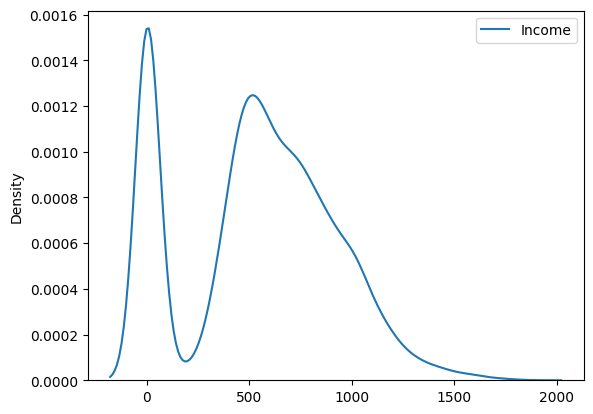

In [243]:
train_pool = Pool(train_x, train_y, cat_features=cat_features)
cat_model = CatBoostRegressor(verbose=50,iterations=500)
cat_model.fit(train_pool)
test=test.drop(columns=['ID','Household_Status'])
test_pool = Pool(test, cat_features=cat_features)
preds = cat_model.predict(test_pool)
submission['Income'] = np.exp(preds)-100000
submission['Income'][submission['Income']<0]=0
display(submission.head(10))
display(submission.describe())
display(sns.kdeplot(submission))
submission.to_csv('/content/gdrive/MyDrive/data/소득예측/sample_data/cat_bye_under_income.csv', index=False)